In [1]:
# Access GEO HiC data via Straw from Aiden Lab

# Juicebox.js is cloud-based visualization software for Hi-C data created by 
# Jim Robinson and Douglass Turner of the IGV team, in collaboration with 
# Neva C. Durand and the Aiden Lab. 
# 
# You can also download a full-fledged desktop version of Juicebox.

# https://github.com/aidenlab/straw/wiki/Python

In [2]:
import straw
import numpy as np
from scipy.sparse import coo_matrix
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import seaborn as sns

# python3 -m pip install hic-straw

In [3]:
hic_path = 'https://ftp.ncbi.nlm.nih.gov/geo/series/GSE63nnn/GSE63525/suppl/GSE63525_GM12878_insitu_primary%2Breplicate_combined.hic'
resolution = 25000
up_rect_sparse = straw.straw('KR', hic_path, '11', '11', 'BP', resolution)

HiC version:  7


In [4]:
row_ind = np.asarray(up_rect_sparse[0])/resolution;
col_ind = np.asarray(up_rect_sparse[1])/resolution;

In [5]:
data = up_rect_sparse[2]
dim = int(np.max([np.max(row_ind), np.max(col_ind)]))+1
mat_coo = coo_matrix((data, (row_ind.astype(int), col_ind.astype(int))), shape = (dim, dim))
dense = mat_coo.toarray()
dense = dense.T + dense
np.fill_diagonal(dense, np.diag(dense))
dense[np.isnan(dense)] = 0

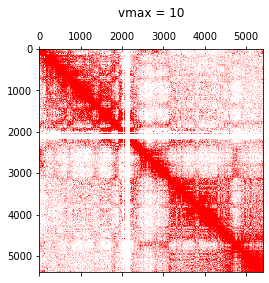

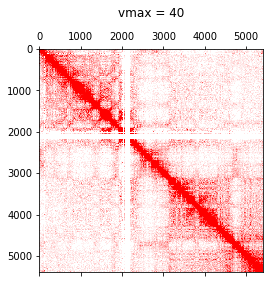

In [6]:
br = LinearSegmentedColormap.from_list('bright_red', [(1,1,1), (1,0,0)])
for i in range(1,3):
    vmax = i * 10
    plt.matshow(dense, cmap=br, vmin = 0, vmax = vmax)
    plt.title('vmax = {0}\n'.format(i * vmax))
    plt.show()